<a href="https://colab.research.google.com/github/mogbuehi/Mistral_AI_Chatbot/blob/main/Mistral_AI_API_Chatbot_Shareable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

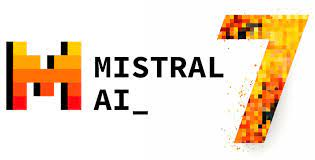 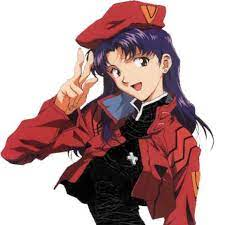

# Mistral AI API Chatbot
Bonjour and Welcome to age of Mistral! This is a very simple chatbot that has the memory of the entire conversation similar to ChatGPT, up to 32K tokens, after which point it will break. All you need to run this is an internet connection and Mistral AI API key (you may be waitlisted for a week or so).

First step is to go get your API key at https://console.mistral.ai/

Afterwards just follow along in the notebook, activate all the cells by hitting the "play" button or "Run all cells command", the chat input will be in the last cell of this notebook. Again, this has memory so you can have a conversation up to 32k tokens, but it will give you an error. Feel free to clone this notebook and modify as you see fit I will be updating this periodically.

This is a very quick starter notebook for interacting with the Mistral AI Python SDK. For a detailed breakdown of the API Endpoint please visit:

- [Mistral AI's Python SDK Repo](https://github.com/mistralai/client-python/tree/main)
- [API endpoint documentation](https://docs.mistral.ai/api/)
- [CustomGPT for the docs (in beta)](https://chat.openai.com/g/g-gEXnaYplU-mistralgpt)

If you have any questions don't hesitate to reach out on LinkedIn:

---
**Matthew Ogbuehi**

Freelance AI Engineer

http://linkedin.com/in/mogbuehi


## Alternatives


If you end up waitlisted some free alternatives that are:
1. [Nvidia cloud hosted instance](https://catalog.ngc.nvidia.com/orgs/nvidia/teams/ai-foundation/models/mixtral-8x7b/api)
2. [HuggingChat 🤗 ](https://huggingface.co/chat/) and be sure to choose the `mistralai/Mixtral-8x7B-Instruct-v0.1` model

## Installing Dependencies

In [ ]:
!pip install mistralai

## Formatting

In [ ]:
# Display markdown format
from IPython.display import display, Markdown
from datetime import datetime
def print_md(string):
    display(Markdown(string))

# Example usage:
print_md("**Bold text**")
print_md("_Italic text_")

current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(current_time)

## Chatbot
To use this, please enter your API key from https://console.mistral.ai/ where it says 'YOUR API KEY'. Be sure to not share this notebook with your API key saved for the sake of your wallet 💰😀

Just like with GPT, you can modify system message and messages follow the familiar `system, user, assistant` format

In [ ]:
from mistralai.models.chat_completion import ChatMessage, ChatCompletionResponse
from mistralai.client import MistralClient

# Initialize your chatbot (setup API keys, select model, etc.)
client = MistralClient(api_key='YOUR API KEY') #<---------- Your API key goes here!

# Define optional parameters
max_tokens = 500  # Maximum number of tokens in the response
temperature = 0.0 # Controls randomness: lower values make responses more predictable
top_p = 1       # Nucleus sampling: higher values allow more diversity
random_seed = 42  # Seed for random number generator for reproducibility
safe_mode = False  # Enable or disable safe mode

# Initialize conversation history
conversation_history = []

# Example of setting a system message
system_message = ChatMessage(role="system", content="You are a helpful assistant named Misato. Be curious to learn about the user and help them with what ever task they ask of you")
conversation_history.append(system_message)

# Start chat loop
while True:
    user_input = input("User message: ")
    if user_input.lower() in ['quit', 'exit']:
        break

    # Append user message to conversation history
    user_chat_message = ChatMessage(role="user", content=user_input)
    conversation_history.append(user_chat_message)

    # Send the chat_message to the Mistral AI model and get the response
    response = client.chat(
        model="mistral-small", # Choose between `mistral-tiny`, `mistral-tiny`, or `mistral-medium`
        messages=conversation_history,
        max_tokens=max_tokens,
        temperature=temperature,
        top_p=top_p,
        random_seed=random_seed,
        safe_mode=safe_mode
    )

     # Extract and append the AI response to the conversation history
    if response.choices:
        ai_response = response.choices[0].message.content
        print_md(f"**AI message**: {ai_response}\n")
        ai_chat_message = ChatMessage(role="assistant", content=ai_response)
        conversation_history.append(ai_chat_message)
    else:
        print_md("**AI message**: Error. No response received.")
        # Assuming response.usage is a dictionary
    for key, value in response.usage:
        print_md(f"{key}: {value}")
    print_md("\n\n\n")

# End of chat session

